In [57]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy as np
import math

In [58]:
# Extract data of the material from the API
with MPRester("TL5oMzFNQZwCXV0W") as m:    
    
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-754555")     
    
    # Data for material id
    data = m.get_data("mp-754555")[0]
  

In [59]:
# Les trois premiers pics sont associés aux plans (111), (100) et (222)
vect1 = [1,1,1]
vect2 = [1,0,0]
vect3 = [2,2,2]

# Paramètre de maille
a = float(data.get('cif')[94:103])

# Angle entre les axes
alpha = float(data.get('cif')[181:192])*(np.pi/180)

Lambda = 1.54060         # unité: ångströms
## print(data.get('cif'))

In [60]:
# Distance entre 2 plans de la famille (111)
d_111 = a * (1-(math.cos(alpha))) * ( (1+2*math.cos(alpha)) / ( (vect1[0]**2 + vect1[1]**2 + vect1[2]**2)*(math.sin(alpha))**2 + 2*(vect1[0]*vect1[1] + vect1[1]*vect1[2] + vect1[0]*vect1[2]) * ((math.cos(alpha))**2 - math.cos(alpha)) ) ) ** (1/2) 

# Angle theta correspondant (obtenu par la loi de Bragg)
theta_111 = np.arcsin(Lambda / (2*d_111)) * 180/np.pi
theta1 = 2 * theta_111
#print(theta1)

In [61]:
# Distance entre 2 plans de la famille (100)
d_100 = a * (1-(math.cos(alpha))) * ( (1+2*math.cos(alpha)) / ( (vect2[0]**2 + vect2[1]**2 + vect2[2]**2)*(math.sin(alpha))**2 + 2*(vect2[0]*vect2[1] + vect2[1]*vect2[2] + vect2[0]*vect2[2]) * ((math.cos(alpha))**2 - math.cos(alpha)) ) ) ** (1/2)

# Angle theta correspondant (obtenu par la loi de Bragg)
theta_100 = np.arcsin(Lambda / (2*d_100)) * 180/np.pi
theta2 = 2 * theta_100
#print(theta2)

In [62]:
# Distance entre 2 plans de la famille (222)
d_222 = a * (1-(math.cos(alpha))) * ( (1+2*math.cos(alpha)) / ( (vect3[0]**2 + vect3[1]**2 + vect3[2]**2)*(math.sin(alpha))**2 + 2*(vect3[0]*vect3[1] + vect3[1]*vect3[2] + vect3[0]*vect3[2]) * ((math.cos(alpha))**2 - math.cos(alpha)) ) ) ** (1/2)

# Angle theta correspondant (obtenu par la loi de Bragg)
theta_222 = np.arcsin(Lambda / (2*d_222)) * 180/np.pi
theta3 = 2*theta_222
#print(theta3)

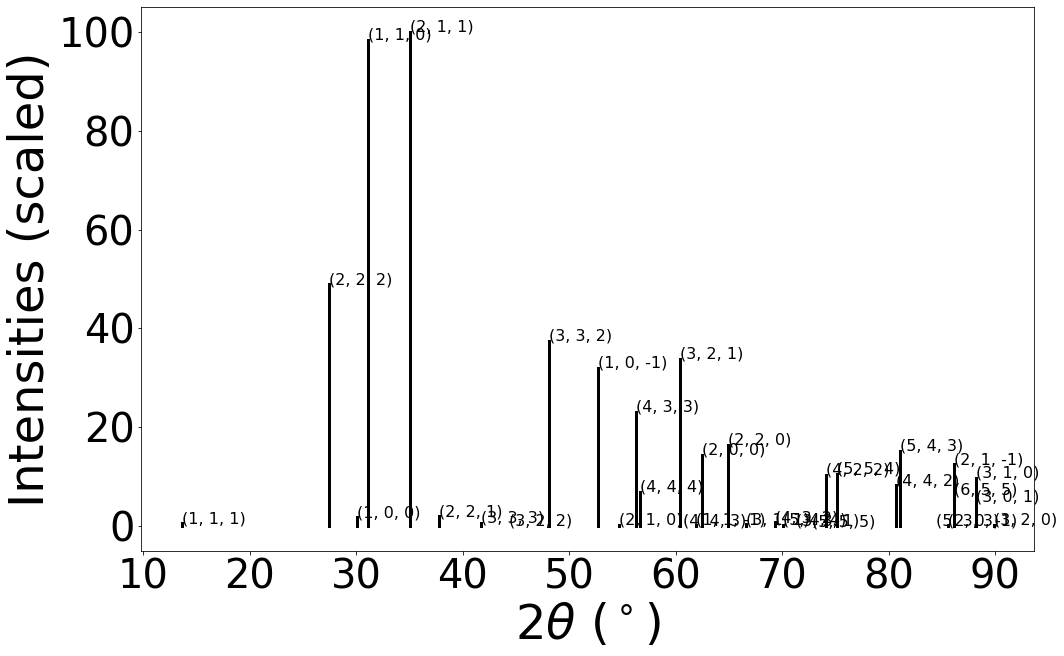

In [63]:
c = XRDCalculator()
c.show_plot(structure)

Pour un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 Å, on voit que les indices hkl des trois premiers pics du diffractogramme correspondant sont: 111, 222 et 100, avec comme intensité respectivement 0, 50 et 2 CPS.